# Significado de “Factor Groupings”:

 - Análise de Fatores (Factor Analysis): É uma técnica estatística utilizada para identificar padrões subjacentes nos dados. Neste contexto, a análise de fatores está sendo aplicada aos retornos dos ativos para identificar agrupamentos ou padrões de comportamento conjunto entre os diferentes grupos de ativos (tecnologia, bancos e commodities).
 - “Factor Groupings”: Refere-se aos agrupamentos ou padrões identificados pelos vetores próprios (eigenvectors) da análise de fatores. Cada par de componentes principais representa uma direção no espaço dos dados onde os ativos têm correlações específicas. A disposição dos pontos no gráfico revela como esses grupos de ativos estão relacionados uns com os outros com base nas correlações de seus retornos.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as stats
import statsmodels.api as sm
import pandas as pd
import matplotlib
import yfinance as yf
from dateutil.parser import parse
%matplotlib inline

import plotly.graph_objects as go

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

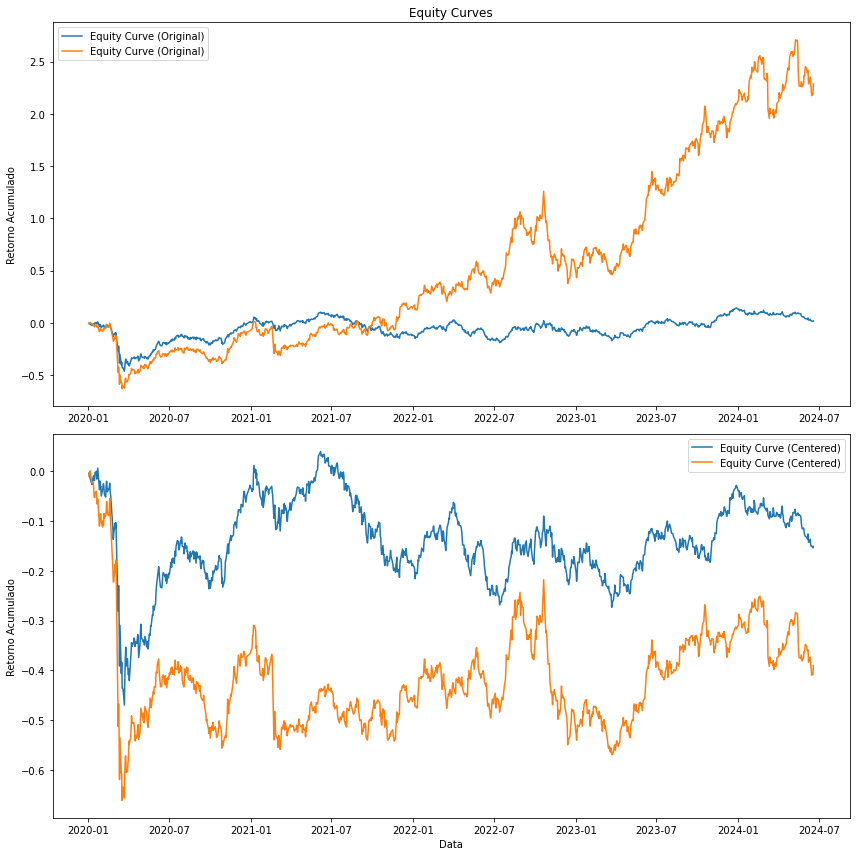

In [13]:
# Download das ações
stocks = yf.download("BOVA11.SA, PETR4.SA", start = "2020-1-1", progress = False)["Adj Close"]

# Calcular as curvas de capital
equity_curve_original = stocks.pct_change().add(1).cumprod().sub(1)
centered_returns = stocks.pct_change().dropna() - stocks.pct_change().mean()
equity_curve_centered = centered_returns.add(1).cumprod().sub(1)

# Ajustar o tamanho da figura
plt.figure(figsize = (12, 12));

# Plotar a curva de capital original
plt.subplot(2, 1, 1);  # Dividir a área de plotagem em 2 linhas, 1 coluna, primeiro gráfico
plt.plot(equity_curve_original.index, equity_curve_original.values, label = "Equity Curve (Original)");
plt.title("Equity Curves");
plt.ylabel("Retorno Acumulado");
plt.legend()

# Plotar a equity curve com a média dos retornos removida
plt.subplot(2, 1, 2)  # Segundo gráfico
plt.plot(equity_curve_centered.index, equity_curve_centered.values, label = "Equity Curve (Centered)");
plt.xlabel("Data");
plt.ylabel("Retorno Acumulado");
plt.legend();

# Ajustar o layout para evitar sobreposição
plt.tight_layout();

# Exibir os gráficos
plt.show();

# Calculando a PCA sem biblioteca

	•	A matriz de covariância S fornece informações sobre como os diferentes ativos (ou séries temporais) estão relacionados entre si em termos de suas variações conjuntas.
	•	Os autovalores (eValues) indicam a magnitude da variância ao longo dos eixos principais definidos pelos autovetores (eVectors). Eles são úteis para entender a quantidade de variância explicada por cada componente principal da matriz de covariância.
	•	Os autovetores (eVectors) são os vetores próprios da matriz de covariância que definem direções no espaço dos ativos (ou séries temporais) onde as variações são maximizadas ou minimizadas.

In [14]:
# Covariance of Centered Returns
S = centered_returns.cov()  # Calcula a matriz de covariância dos retornos centrados
print(S)  # Imprime a matriz de covariância

# Calculate Eigenvalues and Eigenvectors of Covariance Matrix
E = np.linalg.eig(S)  # Calcula os autovalores e autovetores da matriz de covariância S

# EigenValues
print("EigenValues")
eValues = E[0]  # Armazena os autovalores
eValues  # Exibe os autovalores

# EigenVectors
print("EigenVectors - Cada coluna é um EigenVector. Veja como são perpendiculares!")
eVectors = E[1]  # Armazena os autovetores
eVectors  # Exibe os autovetores

           BOVA11.SA  PETR4.SA
BOVA11.SA   0.000292  0.000370
PETR4.SA    0.000370  0.000863
EigenValues


array([0.00011004, 0.00104518])

EigenVectors - Cada coluna é um EigenVector. Veja como são perpendiculares!


array([[-0.89740354, -0.44121071],
       [ 0.44121071, -0.89740354]])

Em uma Análise de Componentes Principais (PCA):

	•	Autovetores: Os autovetores representam as direções dos novos eixos (componentes principais) ao longo dos quais os dados originais são projetados. Cada autovetor é associado a um autovalor, que indica a variância dos dados ao longo da direção do autovetor correspondente.
	•	Autovalores: Os autovalores indicam a magnitude da variância dos dados ao longo dos autovetores. Eles são ordenados em ordem decrescente, o que significa que o primeiro autovalor representa a direção de maior variância nos dados, o segundo representa a segunda maior variância, e assim por diante.

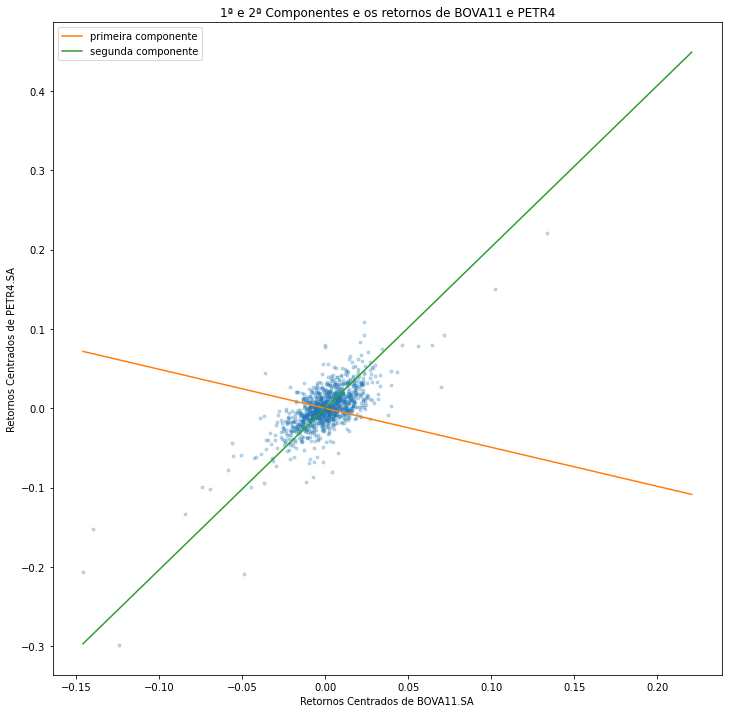

In [15]:
# Plot da Correlação dos Retornos Centrados das Ações
# 1. Computa os Dados para as Linhas dos Componentes Principais
x_axis = np.linspace(np.nanmin(centered_returns["BOVA11.SA"]), np.nanmax(centered_returns["PETR4.SA"]))
dx1 = eVectors[0,0]  # Componente x do primeiro autovetor
dy1 = eVectors[1,0]  # Componente y do primeiro autovetor
slope1 = dy1/dx1  # Calcula a inclinação do primeiro componente principal
dx2 = eVectors[0,1]  # Componente x do segundo autovetor
dy2 = eVectors[1,1]  # Componente y do segundo autovetor
slope2 = dy2/dx2  # Calcula a inclinação do segundo componente principal
y_axis1 = slope1 * x_axis  # Calcula os valores y para o primeiro componente principal
y_axis2 = slope2 * x_axis  # Calcula os valores y para o segundo componente principal

# Ajustar o tamanho da figura
plt.figure(figsize = (12, 12));

# 2. Plota a Correlação dos Retornos Centrados entre "BOVA11.SA" e "PETR4.SA"
plt.plot(centered_returns["BOVA11.SA"], centered_returns["PETR4.SA"], ".", alpha = 0.25)

# 3. Plota os Componentes Principais
plt.title("1ª e 2ª Componentes e os retornos de BOVA11 e PETR4");
plt.plot(x_axis, y_axis1, label = "primeira componente");
plt.plot(x_axis, y_axis2, label = "segunda componente");
plt.legend();  # Adiciona a legenda com os rótulos dos componentes principais
plt.xlabel("Retornos Centrados de BOVA11.SA");  # Rótulo do eixo x
plt.ylabel("Retornos Centrados de PETR4.SA");  # Rótulo do eixo y
plt.show();  # Exibe o gráfico

O que o gráfico quer dizer?

	•	O gráfico mostra a correlação entre os retornos centrados de ‘BOVA11.SA’ e ‘PETR4.SA’.
	•	A presença dos componentes principais ajuda a entender a direção da maior variabilidade nos dados.
	•	A linha verde (segundo componente) tem uma inclinação positiva mais acentuada em comparação à linha laranja (primeiro componente), o que sugere que, no espaço dos dados, há uma relação mais forte de variabilidade ao longo dessa direção.
	•	A linha laranja (primeiro componente) tem uma inclinação negativa, indicando que, na direção de maior variabilidade dos dados, há uma tendência de correlação negativa entre os retornos centrados de ‘BOVA11.SA’ e ‘PETR4.SA’.
	•	Primeira Componente Principal: Captura a maior variabilidade nos dados e indica a direção de maior correlação (positiva ou negativa) entre os retornos centrados.
	•	Segunda Componente Principal: Captura a variabilidade restante nos dados que não é explicada pela primeira componente. É ortogonal à primeira componente e oferece outra perspectiva sobre como os dados estão distribuídos no espaço.

No contexto do seu gráfico, essas componentes ajudam a entender não apenas a correlação entre ‘BOVA11.SA’ e ‘PETR4.SA’, mas também como essa correlação se desdobra em direções específicas no espaço dos dados representadas pelas componentes principais.

# PCA e a quantidade de variância explicada

In [20]:
# Download de outras ações
equities = yf.download("BOVA11.SA, PETR4.SA, VALE3.SA, ITUB4.SA, TRPL4.SA, BBAS3.SA", start = "2020-1-1", progress = False)["Adj Close"]

# Build a PCA Function that returns eigenvectors in order of their sign
def pca(assets):
    x = assets.pct_change().dropna()
    p = np.linalg.eig((x-x.mean()).cov())
    evalues = p[0]
    evectors = p[1]
    # sort
    return np.sort(evalues/sum(evalues))[::-1], evectors[:,np.argsort(evectors)]

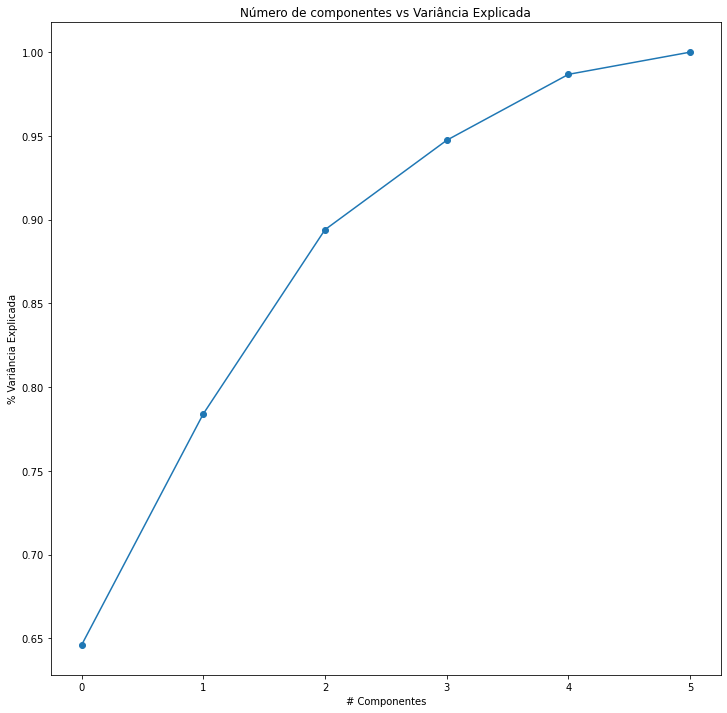

In [21]:
# Explained Variance
evalues, evectors = pca(equities)

# Ajustar o tamanho da figura
plt.figure(figsize=(12, 12));

plt.plot(np.cumsum(evalues), "-o")
plt.title("Número de componentes vs Variância Explicada")
plt.xlabel("# Componentes")
plt.ylabel("% Variância Explicada")
plt.show();

# Factor Analysis

In [22]:
# Vamos definir alguns grupos

# Tecnologia
tech_stocks = yf.download("TOTS3.SA, YDUQ3.SA, PAGS34.SA", start = "2020-1-1", progress = False)["Adj Close"]

# Bancos
bank_stocks = yf.download("ITUB4.SA, BBDC3.SA, SANB11.SA", start = "2020-1-1", progress = False)["Adj Close"]

# Commodities
commodities = yf.download("PETR3.SA, VALE3.SA, GOLD11.SA", start = "2020-1-1", progress = False)["Adj Close"]

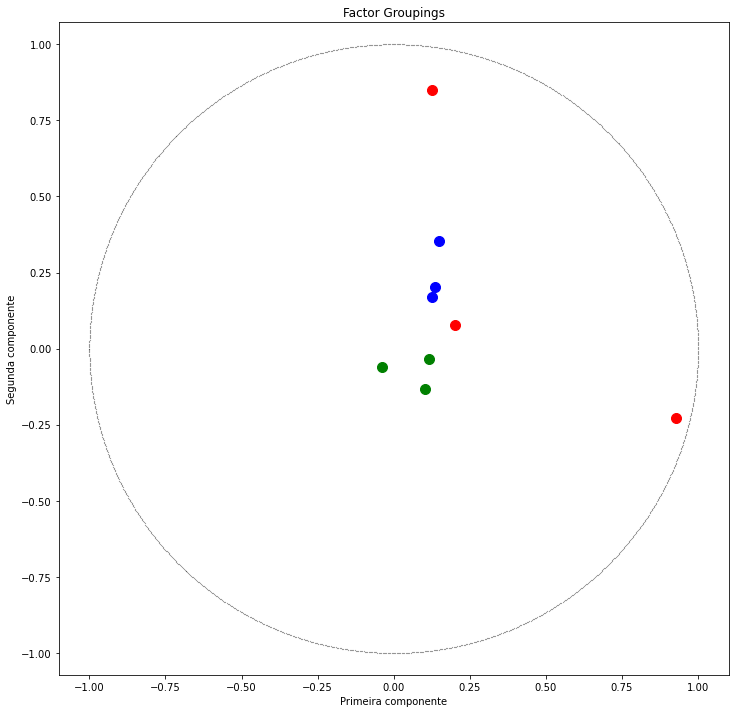

In [26]:
# Factor Analysis

lookback = 100
# Inicializar a lista para armazenar os retornos
r = []

# Iterar sobre os tickers de cada grupo e adicionar os retornos ao list r
for ticker in tech_stocks:
    r.append(tech_stocks[ticker].pct_change().iloc[-lookback:].values)

for ticker in bank_stocks:
    r.append(bank_stocks[ticker].pct_change().iloc[-lookback:].values)

for ticker in commodities:
    r.append(commodities[ticker].pct_change().iloc[-lookback:].values)

# Converter a lista r em um array numpy
R = np.array(r)
R = np.array(r)

# Eigen System: Element [0]=eValues, [1]=eVectors
eigenSystem = np.linalg.eig(np.cov(R-np.mean(R)))

# Plotar os resultados
colour = ["r"]*3 + ["b"]*3 + ["g"]*3

plt.figure(figsize=(12, 12));

# Plot Assets
for j, i in enumerate(eigenSystem[1]):
    plt.plot(i[0], i[1], "-o", c=colour[j], ms=10);

# Plot Circle
for i in np.linspace(-np.pi, np.pi, 1500):
    plt.plot(np.cos(i), np.sin(i), "k.", ms=0.3);
    
# Ajustar título, rótulos e escala
# Ajustar o tamanho da figura
plt.title("Factor Groupings");
plt.xlabel("Primeira componente");
plt.ylabel("Segunda componente");
plt.axis("equal");

# Exibir apenas o gráfico final
plt.show();

# Como automatizar este processo?

In [27]:

def plot_assets_by_principal_components(dataFrame, symbols, lookback):
    r = []
    for symbol in symbols:
        r.append(dataFrame[symbol].pct_change().iloc[-lookback:].values)
    
    R = np.array(r)
    eigenSystem = np.linalg.eig(np.cov(R - np.mean(R)))
    plt.figure(figsize=(12, 12));
    
    for i, symbol in zip(eigenSystem[1], symbols):
        plt.plot(i[0], i[1], "-o", ms = 20)
        
        # Ajustar a posição do texto para melhor alinhamento
        x_offset = 0.02  # Ajustar com base na preferência
        y_offset = 0.02  # Ajustar com base na preferência
        plt.text(i[0] + x_offset, i[1] + y_offset, symbol, fontsize = 12)
    
    # Plotar o círculo
    for i in np.linspace(-np.pi, np.pi, 1500):
        plt.plot(np.cos(i), np.sin(i), "k.", ms = 0.3)
    
    plt.title("Factor Groupings");
    plt.xlabel("Primeira componente");
    plt.ylabel("Segunda componente");
    plt.axis("equal");
    
    # Se desejar retornar algo, adicione o retorno aqui
    # return alguma_coisa (se necessário)

# Exemplo de uso da função
# Supondo que `dataFrame` seja seu dataframe de dados e `symbols` uma lista de símbolos
# plot_assets_by_principal_components(dataFrame, symbols, lookback)

# Factor Grouping na prática

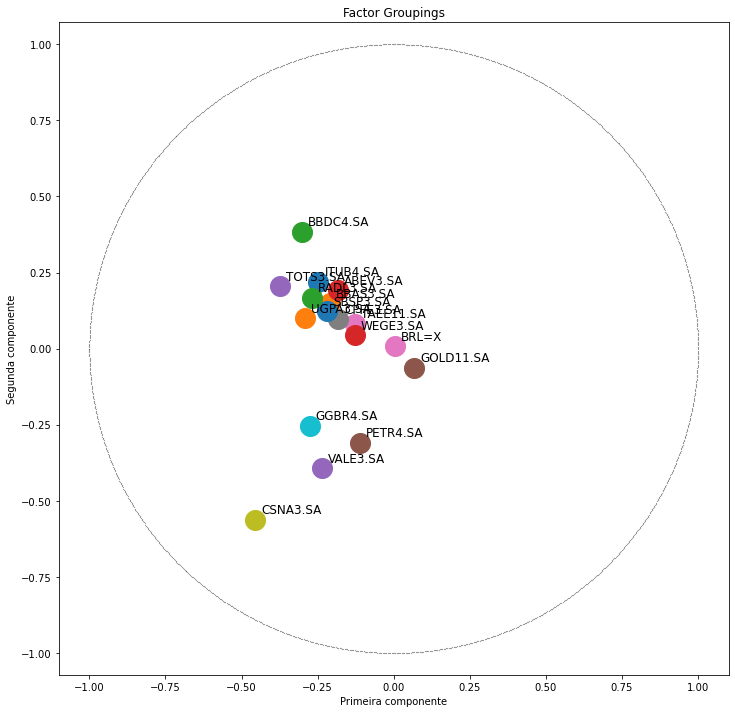

In [30]:

symbols =  ["ITUB4.SA","BBAS3.SA","BBDC4.SA","ABEV3.SA","VALE3.SA","PETR4.SA"
            ,"TAEE11.SA","CPFE3.SA","CSNA3.SA", "GGBR4.SA", "SBSP3.SA"
            ,"UGPA3.SA", "RADL3.SA", "WEGE3.SA", "TOTS3.SA", "GOLD11.SA", "BRL=X"]

df = yf.download(symbols, start = "2015-1-1", progress = False)["Adj Close"]
plot_assets_by_principal_components(df, symbols, 252)

1.	Agrupamentos de Fatores:
 - O gráfico mostra como diferentes ações se agrupam com base nos componentes principais. As ações que estão próximas umas das outras têm comportamentos similares em termos das variáveis usadas para calcular os componentes principais.
 - Ativos como “GOLD11.SA” e “PETR4.SA” estão mais afastadas do centro, indicando que elas têm características distintas das outras ações no conjunto de dados.
2.	Interpretação dos Padrões:
 - Ações que estão próximas umas das outras no gráfico compartilham padrões de comportamento semelhantes, ou seja, elas são influenciadas de forma similar pelos fatores que estão capturados pelas componentes principais.
 - Ações que estão distantes do centro ou de outros grupos podem ser consideradas outliers ou ter características únicas que não são compartilhadas com o restante das ações.
3.	Uso na Análise de Investimentos:
 - Este tipo de análise pode ser útil para identificar grupos de ações que se comportam de maneira similar, ajudando na diversificação da carteira e na identificação de ações com padrões de comportamento únicos.
 - Também pode ajudar a identificar fatores que têm maior influência sobre os retornos das ações, permitindo uma melhor gestão de risco e estratégias de investimento mais informadas.

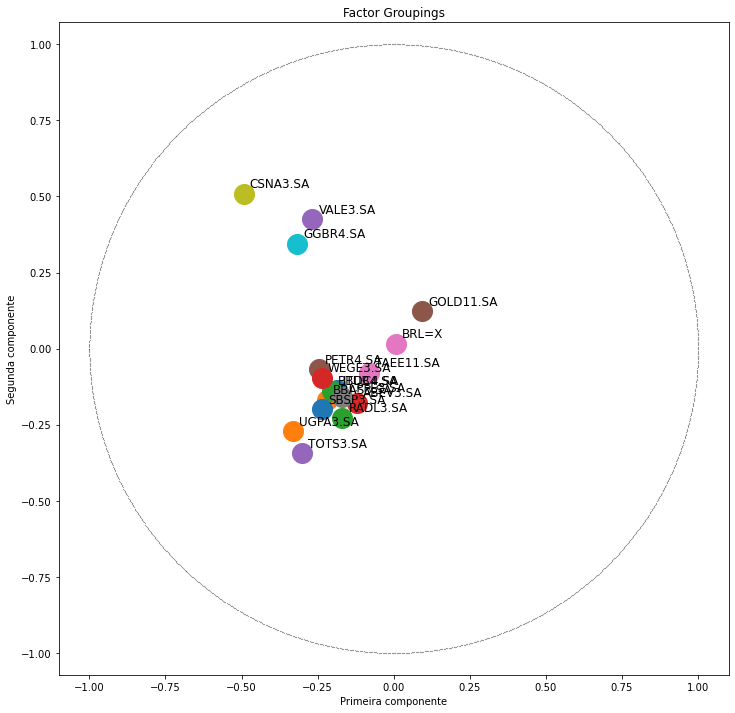

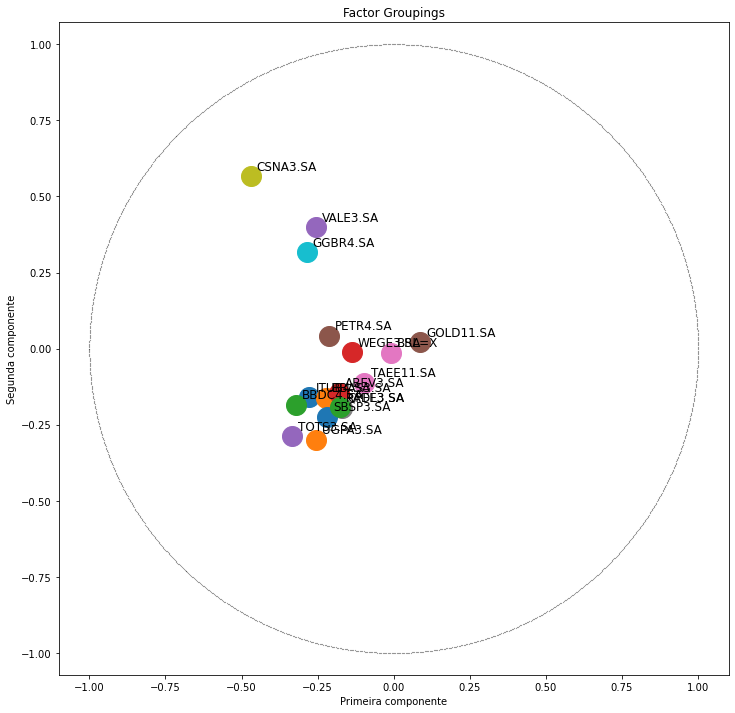

In [34]:
# E em anos diferentes?

symbols =  ["ITUB4.SA","BBAS3.SA","BBDC4.SA","ABEV3.SA","VALE3.SA","PETR4.SA"
            ,"TAEE11.SA","CPFE3.SA","CSNA3.SA", "GGBR4.SA", "SBSP3.SA"
            ,"UGPA3.SA", "RADL3.SA", "WEGE3.SA", "TOTS3.SA", "GOLD11.SA", "BRL=X"]

df = yf.download(symbols, start = "2022-1-1", end = "2022-12-31", progress = False)["Adj Close"]
plot_assets_by_principal_components(df, symbols, 252)

df = yf.download(symbols, start = "2023-1-1", end = "2023-12-31", progress = False)["Adj Close"]
plot_assets_by_principal_components(df, symbols, 252)